# Import Libraries

In [113]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

from scipy.stats import shapiro, kstest, normaltest

# Problem Statement

In [ ]:
#To predict price of cars by using various features

# Data Gathering

In [2]:
auto_data = pd.read_csv('Data_sets/autos_dataset.csv')
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# Exploratory Data Analysis

In [3]:
auto_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
auto_data.describe(include= 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [7]:
auto_obj = auto_data.select_dtypes(include= object)
auto_obj.columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [8]:
auto_data[['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors']].value_counts()

normalized-losses  make        fuel-type  aspiration  num-of-doors
134                toyota      gas        std         two             6
91                 toyota      gas        std         four            6
128                nissan      gas        std         two             4
65                 toyota      gas        std         four            4
102                subaru      gas        std         four            4
                                                                     ..
161                mitsubishi  gas        turbo       two             1
158                audi        gas        turbo       four            1
                                          std         four            1
153                mitsubishi  gas        turbo       two             1
?                  volkswagen  gas        std         two             1
Length: 120, dtype: int64

In [9]:
auto_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [10]:
pd.to_numeric(auto_data['compression-ratio'])

0       9.0
1       9.0
2       9.0
3      10.0
4       8.0
       ... 
200     9.5
201     8.7
202     8.8
203    23.0
204     9.5
Name: compression-ratio, Length: 205, dtype: float64

In [11]:
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### Column_Symboling

In [12]:
auto_data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

### Column_Normalized-losses

In [13]:
auto_data['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [14]:
auto_data['normalized-losses'].mode()

0    ?
Name: normalized-losses, dtype: object

In [15]:
auto_data['normalized-losses'] = auto_data['normalized-losses'].replace({'?': np.nan})
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [16]:
auto_data['normalized-losses'] = auto_data['normalized-losses'].astype(float)
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [17]:
auto_data['normalized-losses'].mean()

122.0

In [18]:
auto_data['normalized-losses'] = auto_data['normalized-losses'].replace({np.nan : auto_data['normalized-losses'].mean()})
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### Column_Make

In [19]:
auto_data = pd.get_dummies(auto_data,columns= ['make'])
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,122.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,122.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,122.0,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


### Column_Fuel-Type

In [20]:
auto_data['fuel-type'].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [21]:
auto_data['fuel-type'] = auto_data['fuel-type'].replace({'gas': 0 , 'diesel': 1})
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,122.0,0,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,122.0,0,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,122.0,0,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,0,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,0,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95.0,0,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95.0,0,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95.0,1,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


### Column_Aspiration

In [22]:
auto_data['aspiration'].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [23]:
auto_data['aspiration'] = auto_data['aspiration'].replace({'std': 0, 'turbo': 1})
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,122.0,0,0,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,122.0,0,0,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,122.0,0,0,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,0,0,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,0,0,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95.0,0,1,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95.0,0,0,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95.0,1,1,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


### Column_Num-Of-Doors

In [24]:
auto_data['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [25]:
auto_data['num-of-doors'].replace({'?': np.nan},inplace= True)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,122.0,0,0,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,122.0,0,0,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,122.0,0,0,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,0,0,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,0,0,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95.0,0,1,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95.0,0,0,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95.0,1,1,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


In [26]:
auto_data['num-of-doors'] = auto_data['num-of-doors'].fillna(auto_data['num-of-doors'].mode()[0])
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,122.0,0,0,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,122.0,0,0,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,122.0,0,0,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,0,0,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,0,0,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95.0,0,1,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95.0,0,0,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95.0,1,1,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


In [27]:
auto_data['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [28]:
auto_data['num-of-doors'] = auto_data['num-of-doors'].replace({'four': 4 , 'two': 2})
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,122.0,0,0,2,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,122.0,0,0,2,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,122.0,0,0,2,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,0,0,4,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,0,0,4,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95.0,0,1,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95.0,0,0,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95.0,1,1,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


### Column_Body-Style

In [29]:
auto_data['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [30]:
auto_data = pd.get_dummies(auto_data, columns=['body-style'])
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,122.0,0,0,2,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,3,122.0,0,0,2,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,1,122.0,0,0,2,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,164.0,0,0,4,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,rwd,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0
201,-1,95.0,0,1,4,rwd,front,109.1,188.8,68.8,...,0,0,0,0,1,0,0,0,1,0
202,-1,95.0,0,0,4,rwd,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0
203,-1,95.0,1,1,4,rwd,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0


### Column_Drive-Wheels

In [31]:
auto_data['drive-wheels'].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [32]:
auto_data['drive-wheels'].replace({'fwd': 0, 'rwd': 1, '4wd': 2},inplace= True)

In [33]:
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,122.0,0,0,2,1,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,3,122.0,0,0,2,1,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,1,122.0,0,0,2,1,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,164.0,0,0,4,2,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0
201,-1,95.0,0,1,4,1,front,109.1,188.8,68.8,...,0,0,0,0,1,0,0,0,1,0
202,-1,95.0,0,0,4,1,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0
203,-1,95.0,1,1,4,1,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0


### Column_Engine-Location

In [34]:
auto_data['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [35]:
auto_data['engine-location'] = auto_data['engine-location'].replace({'front' : 0 , 'rear' : 1})
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,1,0,0,0,1,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0


### Column_Wheel-Base

In [36]:
auto_data['wheel-base'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheel-base, dtype: int64

### Column_Length

In [37]:
auto_data['length'].value_counts()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: length, Length: 75, dtype: int64

In [38]:
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,1,0,0,0,1,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0


### Column_Width

In [39]:
auto_data['width'].value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: width, dtype: int64

### Column_Engine-Type

In [40]:
auto_data['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [41]:
auto_data = pd.get_dummies(auto_data,columns= ['engine-type'])
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,0,1,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,1,0,0,0,0,1,0,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,1,0,0,0,0,1,0,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,1,0,0,0,0,0,0,1,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,1,0,0,0,0,1,0,0,0


### Column_Num-Of Cylinders

In [42]:
auto_data['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [43]:
auto_data['num-of-cylinders'].replace({'four': 4,'six': 6,'five': 5,'eight': 8,'two': 2,'three': 3,'twelve': 12},inplace= True)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,0,1,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,1,0,0,0,0,1,0,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,1,0,0,0,0,1,0,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,1,0,0,0,0,0,0,1,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,1,0,0,0,0,1,0,0,0


In [44]:
auto_data.iloc[:,:20]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,52.4,2823,6,152,mpfi,2.68,3.47,9.0,154,5000
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,54.3,2337,4,109,mpfi,3.19,3.4,10.0,102,5500
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,54.3,2824,5,136,mpfi,3.19,3.4,8.0,115,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,55.5,2952,4,141,mpfi,3.78,3.15,9.5,114,5400
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,55.5,3049,4,141,mpfi,3.78,3.15,8.7,160,5300
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,55.5,3012,6,173,mpfi,3.58,2.87,8.8,134,5500
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,55.5,3217,6,145,idi,3.01,3.4,23.0,106,4800


### Column_Fuel-system

In [45]:
auto_data['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [46]:
auto_data = pd.get_dummies(auto_data, columns= ['fuel-system'])
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


### Column_Bore

In [47]:
auto_data['bore'].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.6      1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore, dtype: int64

In [48]:
auto_data['bore'].replace({'?' : np.nan},inplace= True)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [49]:
auto_data['bore'].isna().sum()

4

In [50]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int64  
 5   drive-wheels            205 non-null    int64  
 6   engine-location         205 non-null    int64  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int64  
 13  engine-size             205 non-null    int64  
 14  bore                    201 non-null    ob

In [51]:
auto_data['bore'].median()

3.31

In [52]:
auto_data['bore'] = auto_data['bore'].fillna(auto_data['bore'].median()).astype(float)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [53]:
auto_data['bore'].isna().sum()

0

### Column_Stroke

In [54]:
auto_data['stroke'].value_counts()

3.4     20
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.11     6
3.27     6
3.41     6
3.07     6
3.58     6
3.19     6
3.5      6
3.64     5
3.52     5
3.86     4
3.54     4
3.47     4
?        4
3.9      3
2.9      3
3.1      2
4.17     2
2.8      2
2.19     2
3.08     2
2.68     2
2.36     1
3.16     1
2.07     1
3.21     1
3.12     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [55]:
auto_data['stroke'].replace({'?' : np.nan}, inplace= True)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [56]:
auto_data['stroke'].isna().sum()

4

In [57]:
auto_data['stroke'] = auto_data['stroke'].fillna(auto_data['stroke'].median()).astype(float)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [58]:
auto_data['stroke'].isna().sum()

0

### Column_Horsepower

In [59]:
auto_data['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [60]:
auto_data['horsepower'].replace({'?' : np.nan},inplace= True)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [61]:
auto_data['horsepower'].isna().sum()

2

In [62]:
auto_data['horsepower'].median()

95.0

In [63]:
auto_data['horsepower'] = auto_data['horsepower'].fillna(auto_data['horsepower'].median()).astype(float)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [64]:
auto_data['horsepower'].isna().sum()

0

### Column_Peak-RPM

In [65]:
auto_data['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
4500     7
5800     7
4200     5
4150     5
4750     4
4350     4
5100     3
4250     3
5900     3
4400     3
?        2
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peak-rpm, dtype: int64

In [66]:
auto_data['peak-rpm'].replace({'?' : np.nan},inplace= True)
auto_data['peak-rpm'].isna().sum()

2

In [67]:
auto_data['peak-rpm'].median()

5200.0

In [68]:
auto_data['peak-rpm'] = auto_data['peak-rpm'].fillna(auto_data['peak-rpm'].median()).astype(float)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [69]:
auto_data['peak-rpm'].isna().sum()

0

### Column_Price

In [70]:
auto_data['price'].value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [71]:
auto_data['price'].replace({'?' : np.nan},inplace= True)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [72]:
auto_data['price'].isna().sum()

4

In [73]:
auto_data['price'] = auto_data['price'].fillna(auto_data['price'].median()).astype(float)
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [74]:
auto_data['price'].isna().sum()

0

In [75]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int64  
 5   drive-wheels            205 non-null    int64  
 6   engine-location         205 non-null    int64  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int64  
 13  engine-size             205 non-null    int64  
 14  bore                    205 non-null    fl

In [76]:
auto_data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [77]:
auto_data.describe()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,0.097561,0.180488,3.131707,0.458537,0.014634,98.756585,174.049268,65.907805,...,0.063415,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,31.681008,0.297446,0.385535,0.993715,0.581148,0.120377,6.021776,12.337289,2.145204,...,0.244304,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,65.000000,0.000000,0.000000,2.000000,0.000000,0.000000,86.600000,141.100000,60.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,0.000000,0.000000,2.000000,0.000000,0.000000,94.500000,166.300000,64.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,122.000000,0.000000,0.000000,4.000000,0.000000,0.000000,97.000000,173.200000,65.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,137.000000,0.000000,0.000000,4.000000,1.000000,0.000000,102.400000,183.100000,66.900000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,256.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
auto_data.dtypes

symboling              int64
normalized-losses    float64
fuel-type              int64
aspiration             int64
num-of-doors           int64
                      ...   
fuel-system_idi        uint8
fuel-system_mfi        uint8
fuel-system_mpfi       uint8
fuel-system_spdi       uint8
fuel-system_spfi       uint8
Length: 64, dtype: object

## Linearity

In [97]:
auto_data.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,4.651899e-01,-0.194311,-0.059866,-0.663595,-0.111150,2.124709e-01,-0.531954,-0.357612,-0.232919,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,6.570742e-02
normalized-losses,0.465190,1.000000e+00,-0.101437,-0.006823,-0.357192,0.151494,-2.918301e-17,-0.056518,0.019209,0.084195,...,0.141869,0.124984,-0.133567,-0.148000,0.107971,-0.101437,0.050954,0.200111,0.064037,-7.938240e-17
fuel-type,-0.194311,-1.014370e-01,1.000000,0.401397,0.188496,0.051874,-4.006951e-02,0.308346,0.212679,0.233880,...,-0.085556,-0.046383,-0.078293,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-2.302046e-02
aspiration,-0.059866,-6.822700e-03,0.401397,1.000000,0.052803,0.153897,-5.719146e-02,0.257611,0.234539,0.300567,...,-0.070070,-0.066203,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-3.285724e-02
num-of-doors,-0.663595,-3.571925e-01,0.188496,0.052803,1.000000,-0.003230,-1.391294e-01,0.439635,0.385675,0.197735,...,-0.054764,-0.161052,-0.097150,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-7.993167e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel-system_idi,-0.194311,-1.014370e-01,1.000000,0.401397,0.188496,0.051874,-4.006951e-02,0.308346,0.212679,0.233880,...,-0.085556,-0.046383,-0.078293,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-2.302046e-02
fuel-system_mfi,0.122067,5.095369e-02,-0.023020,0.149190,-0.079932,-0.055378,-8.532374e-03,-0.033294,-0.004831,0.012832,...,-0.018218,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-4.901961e-03
fuel-system_mpfi,0.012532,2.001105e-01,-0.302574,-0.050041,0.035746,0.369782,1.324288e-01,0.348891,0.511374,0.461896,...,0.282760,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-6.442988e-02
fuel-system_spdi,0.181939,6.403722e-02,-0.070457,0.394703,-0.148565,-0.128419,-2.611429e-02,-0.117359,-0.079790,-0.046399,...,-0.055759,-0.030229,-0.051026,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-1.500300e-02


# Model Training

## Train_Test_Split

In [83]:
x = auto_data.drop('price', axis= 1)
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,4,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,4,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,4,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [84]:
y = auto_data['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 22)

In [86]:
x_train

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
72,3,142.0,0,0,2,1,0,96.6,180.3,70.5,...,1,0,0,0,0,0,0,1,0,0
61,1,129.0,0,0,2,0,0,98.8,177.8,66.5,...,0,0,0,1,0,0,0,0,0,0
6,1,158.0,0,0,4,0,0,105.8,192.7,71.4,...,0,0,0,0,0,0,0,1,0,0
159,0,91.0,1,0,4,0,0,95.7,166.3,64.4,...,0,0,0,0,0,1,0,0,0,0
2,1,122.0,0,0,2,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0,106.0,0,0,4,0,0,97.2,173.4,65.2,...,0,0,0,1,0,0,0,0,0,0
192,0,122.0,1,1,4,0,0,100.4,180.2,66.9,...,0,0,0,0,0,1,0,0,0,0
44,1,122.0,0,0,2,0,0,94.5,155.9,63.6,...,0,0,0,1,0,0,0,0,0,0
132,3,150.0,0,0,2,0,0,99.1,186.6,66.5,...,0,0,0,0,0,0,0,1,0,0


In [87]:
y_train

72     35056.0
61     10595.0
6      17710.0
159     7788.0
2      16500.0
        ...   
100     9549.0
192    13845.0
44     10295.0
132    11850.0
117    18150.0
Name: price, Length: 164, dtype: float64

In [88]:
x_test

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
165,1,168.0,0,0,2,1,0,94.5,168.7,64.0,...,0,0,0,0,0,0,0,1,0,0
182,2,122.0,1,0,2,0,0,97.3,171.7,65.5,...,0,0,0,0,0,1,0,0,0,0
118,1,119.0,0,0,2,0,0,93.7,157.3,63.8,...,0,0,0,1,0,0,0,0,0,0
94,1,128.0,0,0,2,0,0,94.5,165.3,63.8,...,0,0,0,1,0,0,0,0,0,0
123,-1,74.0,0,0,4,0,0,103.3,174.6,64.6,...,0,0,0,1,0,0,0,0,0,0
20,0,81.0,0,0,4,0,0,94.5,158.8,63.6,...,0,0,0,1,0,0,0,0,0,0
77,2,161.0,0,0,2,0,0,93.7,157.3,64.4,...,0,0,0,1,0,0,0,0,0,0
148,0,85.0,0,0,4,2,0,96.9,173.6,65.4,...,0,0,0,1,0,0,0,0,0,0
92,1,122.0,0,0,4,0,0,94.5,165.3,63.8,...,0,0,0,1,0,0,0,0,0,0
32,1,101.0,0,0,2,0,0,93.7,150.0,64.0,...,0,0,1,0,0,0,0,0,0,0


In [89]:
y_test

165     9298.0
182     7775.0
118     5572.0
94      7299.0
123     8921.0
20      6575.0
77      6189.0
148     8013.0
92      6849.0
32      5399.0
82     12629.0
87      9279.0
3      13950.0
46     11048.0
36      7295.0
175     9988.0
50      5195.0
194    12940.0
97      7999.0
110    13860.0
177    11248.0
75     16503.0
163     8058.0
12     20970.0
120     6229.0
107    11900.0
41     12945.0
181    15750.0
30      6479.0
74     45400.0
54      7395.0
119     7957.0
158     7898.0
171    11549.0
178    16558.0
166     9538.0
104    17199.0
153     6918.0
138     5118.0
187     9495.0
13     21105.0
Name: price, dtype: float64

## Linear_Regression

In [91]:
df_lin = LinearRegression()
df_lin

LinearRegression()

In [92]:
df_lin.fit(x_train,y_train)

LinearRegression()

In [93]:
df_lin.coef_

array([ 1.99198482e+02,  4.85978950e+00,  4.17167347e+03,  1.88790437e+03,
        9.20805659e+00, -1.45892593e+02,  7.29626736e+03,  3.64506095e+02,
       -1.46713440e+02,  6.09272385e+02, -3.35187642e+02,  6.23614033e+00,
        5.53234285e+02,  8.73958126e+01, -2.95533178e+03, -5.81340811e+02,
       -7.46597335e+02, -1.62666992e+01,  1.74934490e+00, -8.06077421e+01,
        1.74306500e+02,  3.15679679e+03, -1.20224960e+03,  9.01188095e+03,
       -1.46217119e+03, -2.90312459e+03, -2.24965309e+03,  4.55996477e+02,
       -3.99855666e+02,  2.77939657e+02,  3.45448851e+03,  9.09494702e-13,
       -3.85667558e+03, -6.99747062e+02, -8.15667177e+03, -3.41424751e+03,
        7.14497536e+03, -1.47676159e+03,  4.27698106e+03, -2.78891644e+03,
       -7.99661043e+02, -1.77679453e+02,  1.80835578e+03,  2.72036469e+03,
       -1.19259401e+03, -1.46963044e+03, -1.51666717e+01, -4.29735702e+01,
        7.38660740e+02, -2.09745581e+04,  6.44310777e+03,  1.26473212e+03,
        4.50735091e+03, -

In [94]:
df_lin.intercept_

-42729.123700238924

## Normality_of_Residual

### For_Training

In [105]:
y_pred_train = df_lin.predict(x_train)
y_pred_train

array([34197.26224475, 11013.00397461, 18064.00557974,  6807.01668299,
       15726.14808427, 17433.47035369,  6542.72933238,  7147.28585459,
        6323.47270013,  7822.0669477 ,  7480.98437093, 22018.        ,
        7538.2536357 ,  7768.98469194,  8570.66569304,  8442.99996899,
       40103.16349579,  9084.39968874, 33132.21704116, 14061.89810444,
        6310.6266781 , 20036.66654487,  8908.33621083,  5946.59478333,
       20703.01516174, 14784.80142777,  6511.29133655, 17300.80576848,
        5941.05814823, 15384.42595786,  9017.5015535 ,  5147.85868711,
        6980.64369998,  9001.3398392 ,  6202.27678411, 28456.4707556 ,
       17820.95032428,  9718.70404822,  5116.13796791, 10683.61143141,
        7731.61311169, 15641.62448874, 11013.00397461, 19656.68569333,
       21089.28233126, 23450.2162727 ,  9030.48827395, 12134.60643279,
        7538.2536357 ,  5913.19550935, 10345.        ,  8649.80599972,
       18539.6163139 , 14723.87657461,  9326.45719548,  8321.62689595,
      

In [106]:
residual_train = y_train - y_pred_train
residual_train

72      858.737755
61     -418.003975
6      -354.005580
159     980.983317
2       773.851916
          ...     
100    -852.668367
192    2732.127427
44      510.733617
132   -1366.133126
117       6.431938
Name: price, Length: 164, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

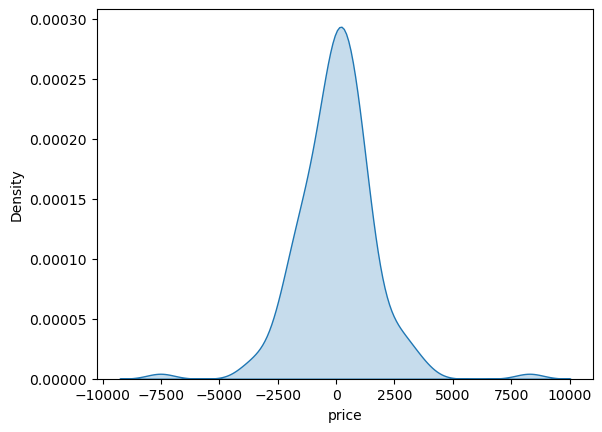

In [107]:
sns.kdeplot(residual_train, fill= True)

<Axes: xlabel='price', ylabel='Count'>

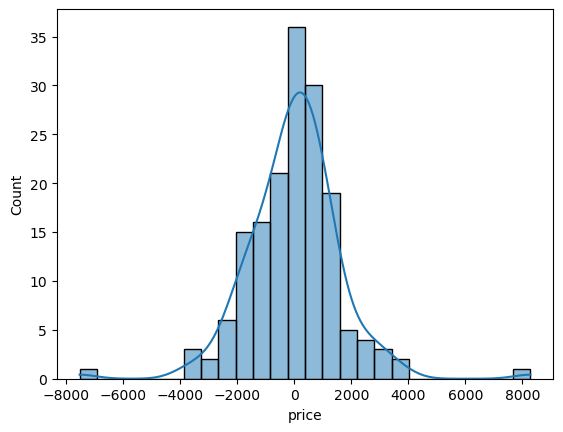

In [108]:
sns.histplot(residual_train, kde= True)

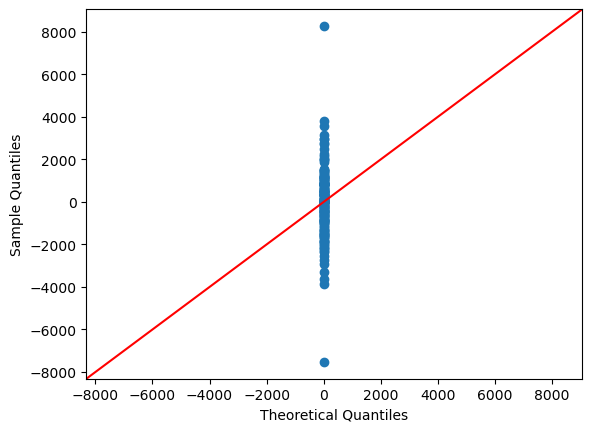

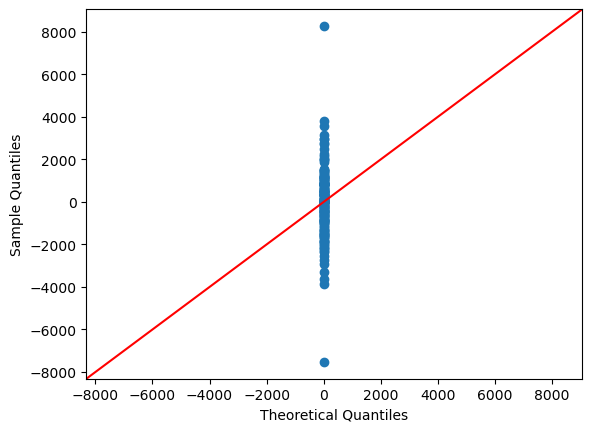

In [111]:
sm.qqplot(residual_train, line= '45')

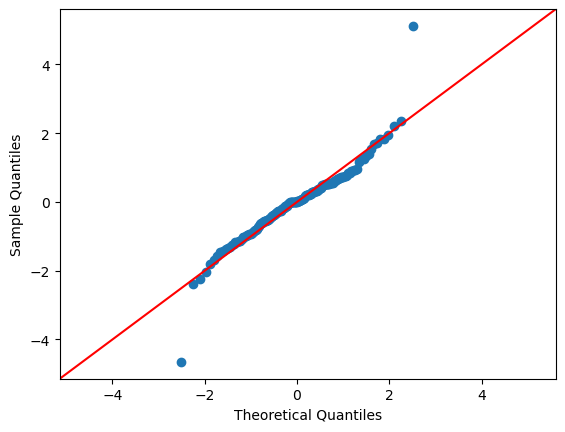

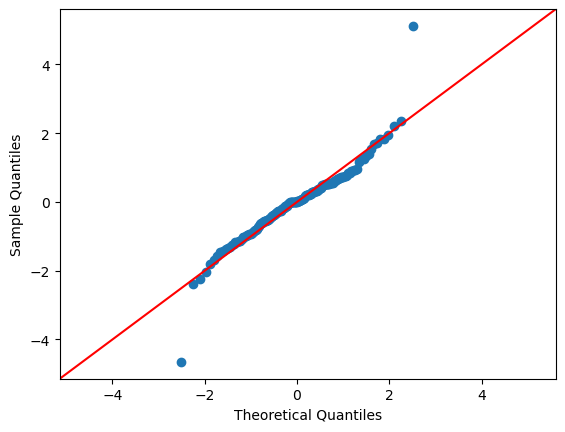

In [112]:
sm.qqplot(residual_train, line= '45', fit= True)

## Hypothesis Testing

### 1. Shapiro

In [115]:
stat, p_value = shapiro(residual_train)
p_value

4.2589977056195494e-07

In [116]:
stat

0.9308717250823975

In [121]:
stat, p_value = shapiro(residual_train)
print("P value is :",p_value)

if p_value > 0.05 :
    print("Data is normally distributed")
    
else:
    print("Data is not normally distributed")


P value is : 4.2589977056195494e-07
Data is not normally distributed


### 2. kstest

In [122]:
stat1, p_val = kstest(residual_train, 'norm')
print("P value is :",p_val)

if p_val > 0.05 :
    print("Data is normally distributed")
    
else:
    print("Data is not normally distributed")


P value is : 1.7517334638407275e-41
Data is not normally distributed


### 3. normaltest

In [123]:
stat2, p_value1 = normaltest(residual_train)
print("P value is :",p_value1)

if p_value1 > 0.05 :
    print("Data is normally distributed")
    
else:
    print("Data is not normally distributed")


P value is : 3.67851201232356e-07
Data is not normally distributed


# Model Evaluation

### For_Testing

In [124]:
y_pred_test = df_lin.predict(x_test)
y_pred_test

array([ 7663.52391796,  8541.94954083,  4942.7864961 ,  6529.26533087,
        8192.7075483 ,  7278.86091083,  5566.8897287 ,  8984.03632998,
        6437.45288282,  5442.29839126, 13888.45805528, 10662.07641442,
        9172.54591506, 11734.005908  ,  7195.69998751,  8599.42792512,
        5244.00562399, 15286.10161536,  6550.9796637 , 16957.81805057,
        8873.81809944, 15452.65888527,  7438.47563792, 24719.40975067,
        5464.6305976 , 13147.4692518 ,  7612.02144587, 17464.64625079,
        5114.6108724 , 36283.42033032,  6996.86971359,  7926.65553214,
        6599.50238361, 11090.39943571, 18209.56295876,  6427.32506414,
       15950.87659151,  5875.22412653,  6542.53597489,  9191.59539803,
       25080.81358175])

In [126]:
residual_test = y_test - y_pred_test
residual_test

165    1634.476082
182    -766.949541
118     629.213504
94      769.734669
123     728.292452
20     -703.860911
77      622.110271
148    -971.036330
92      411.547117
32      -43.298391
82    -1259.458055
87    -1383.076414
3      4777.454085
46     -686.005908
36       99.300012
175    1388.572075
50      -49.005624
194   -2346.101615
97     1448.020336
110   -3097.818051
177    2374.181901
75     1050.341115
163     619.524362
12    -3749.409751
120     764.369402
107   -1247.469252
41     5332.978554
181   -1714.646251
30     1364.389128
74     9116.579670
54      398.130286
119      30.344468
158    1298.497616
171     458.600564
178   -1651.562959
166    3110.674936
104    1248.123408
153    1042.775873
138   -1424.535975
187     303.404602
13    -3975.813582
Name: price, dtype: float64

In [127]:
mse_test = mean_squared_error(y_test,y_pred_test)
print('MSE value is :', mse_test)
print()

rmse_test = np.sqrt(mse_test)
print('RMSE value is :',rmse_test)
print()

mae_test = mean_absolute_error(y_test,y_pred_test)
print('MAE value is :',mae_test)
print()

r2_score_test = r2_score(y_test,y_pred_test)
print('R squared value is :',r2_score_test)

MSE value is : 5546749.845155989

RMSE value is : 2355.1538899095294

MAE value is : 1611.9923194864682

R squared value is : 0.8800607954463763


### For_Training

In [128]:
mse_train = mean_squared_error(y_train,y_pred_train)
print('MSE value is :', mse_train)
print()

rmse_train = np.sqrt(mse_train)
print('RMSE value is :',rmse_train)
print()

mae_train = mean_absolute_error(y_train,y_pred_train)
print('MAE value is :',mae_train)
print()

r2_score_train = r2_score(y_train,y_pred_train)
print('R squared value is :',r2_score_train)

MSE value is : 2616583.009110647

RMSE value is : 1617.5855492401774

MAE value is : 1131.566662077902

R squared value is : 0.9592796846210444


## Regularization

### Lasso_Reg

In [129]:
lasso_df = Lasso()
lasso_df

Lasso()

In [130]:
lasso_df.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.710e+08, tolerance: 1.054e+06
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [131]:
lasso_df.score(x_train, y_train)

0.9590854392896848

### Training Data Evaluation

In [132]:
lasso_model = Lasso(alpha= 2)
lasso_model

Lasso(alpha=2)

In [133]:
lasso_model.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 1.054e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2)

In [134]:
y_pred_train_lasso = lasso_model.predict(x_train)
y_pred_train_lasso

array([33976.01820934, 10855.14401048, 17979.84360749,  6771.53895786,
       15539.85572215, 17134.81790613,  6552.10619192,  6971.73343903,
        6295.45395666,  7569.85060417,  7689.34492118, 21690.09207678,
        7530.54686418,  7723.57720324,  8662.0059892 ,  8410.52379351,
       40152.460065  ,  8970.4048066 , 33011.50544756, 14008.42404252,
        6246.16600917, 20043.74016323,  8934.62165583,  6095.29141052,
       20388.19826528, 14709.46858009,  6350.54302573, 17240.93453155,
        6207.44814453, 15313.59308533,  8941.24745355,  5244.46226017,
        6627.52197469,  8644.90876547,  6054.27483429, 28592.56894186,
       17821.14635886,  9810.4756319 ,  5218.14775792, 10718.02573274,
        7737.85442369, 15859.45259306, 10855.14401048, 19857.5375518 ,
       21239.92582145, 22999.10218965,  9072.64876548, 12244.19882525,
        7530.54686418,  5964.31671831, 10761.25741473,  8595.68306745,
       18542.97410653, 14294.12967182,  9565.6606464 ,  8477.32195363,
      

In [135]:
mse_lasso = mean_squared_error(y_train,y_pred_train_lasso)
print("Mean Squared Error :",mse_lasso)
print()

rmse_lasso = np.sqrt(mse_lasso)
print("Root Mean Squared Error :",rmse_lasso)
print()

mae_lasso = mean_absolute_error(y_train,y_pred_train_lasso)
print("Mean Absolute Error :",mae_lasso)
print()

r2_score_lasso = r2_score(y_train,y_pred_train_lasso)
print("R Squared Value : ",r2_score_lasso)

Mean Squared Error : 2662278.365831726

Root Mean Squared Error : 1631.6489713880637

Mean Absolute Error : 1157.5950064872404

R Squared Value :  0.9585685551324873


### Testing Data Evaluation

In [136]:
y_pred_test_lasso = lasso_model.predict(x_test)
y_pred_test_lasso

array([ 7975.48673417,  8411.53812794,  5188.9777139 ,  6496.21938859,
        8393.65351159,  8254.45279134,  5842.42008648,  8934.54576498,
        6496.10706462,  5810.60318664, 13891.33293924, 10615.67075254,
       10384.1525007 , 11824.08884931,  7283.05593459,  8796.3897284 ,
        5487.71933545, 15609.78126818,  6451.03759263, 16906.32547834,
        9064.07697098, 15174.44515707,  7142.75363279, 24975.39367326,
        5775.28034829, 13359.24958398,  8554.38358951, 17496.36855905,
        5420.82729639, 36351.32841346,  7049.51223004,  7942.04585084,
        6563.31220179, 11453.90399465, 18225.32878052,  6887.00793566,
       16203.84362889,  5807.34810043,  6428.68938837,  9512.48318645,
       25415.77331308])

In [137]:
mse = mean_squared_error(y_test,y_pred_test_lasso)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_test,y_pred_test_lasso)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_test,y_pred_test_lasso)
print("R Squared Value : ",r_squared)

Mean Squared Error : 5113017.677009574

Root Mean Squared Error : 2261.1982834350406

Mean Absolute Error : 1549.4823261515248

R Squared Value :  0.8894395294237577


In [138]:
s1 = pd.Series(lasso_model.coef_, index= x.columns)
s1

symboling             145.986599
normalized-losses       4.465583
fuel-type            1691.188568
aspiration           2036.034644
num-of-doors           52.885293
                        ...     
fuel-system_idi         0.000000
fuel-system_mfi     -1147.255137
fuel-system_mpfi     -622.144205
fuel-system_spdi        0.000000
fuel-system_spfi        0.000000
Length: 63, dtype: float64

<Axes: >

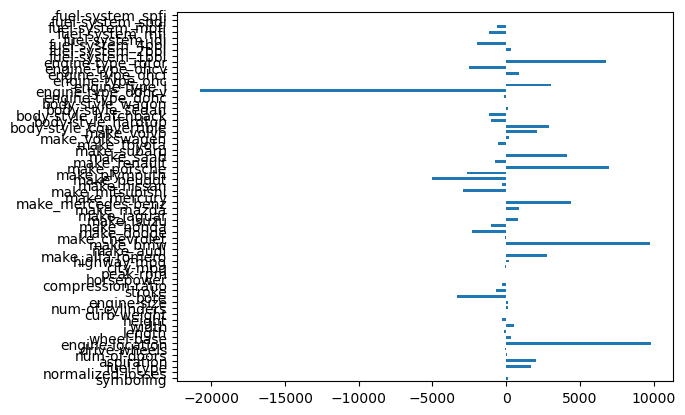

In [141]:
s1.plot(kind = 'barh')

### Ridge_Reg

In [143]:
ridge_model = Ridge()
ridge_model

Ridge()

In [144]:
ridge_model.fit(x_train, y_train)

Ridge()

In [145]:
ridge_model.score(x_train, y_train)

0.9427953719826788

In [149]:
s2 = pd.Series(ridge_model.coef_, index= x.columns)
s2

symboling             376.211762
normalized-losses       1.251223
fuel-type             407.187510
aspiration           2174.568145
num-of-doors           62.289012
                        ...     
fuel-system_idi       407.187510
fuel-system_mfi      -888.818448
fuel-system_mpfi      231.000537
fuel-system_spdi     -170.837784
fuel-system_spfi        0.000000
Length: 63, dtype: float64

<Axes: >

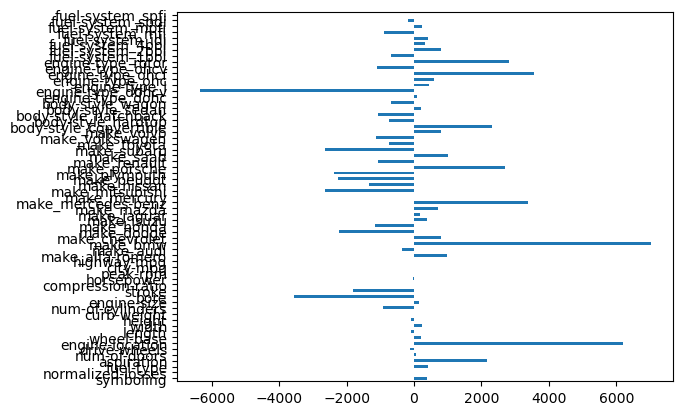

In [150]:
s2.plot(kind = 'barh')

### Training Data Evaluation

In [146]:
y_pred_train_ridge = ridge_model.predict(x_train)
y_pred_train_ridge

array([33197.14883928, 10908.93381533, 17746.24538357,  6892.89308713,
       14397.43493221, 16379.62959892,  6185.42027988,  6674.74328467,
        6220.06317443,  7029.76300183,  8611.22665057, 19139.61520734,
        7431.7571851 ,  8958.06538081,  9800.3909559 ,  8440.98567571,
       40889.18814982,  8640.51623585, 31370.69924366, 14425.44411682,
        5950.41889719, 19959.26035532,  9355.21147453,  6044.41591383,
       20820.23880036, 14260.75389421,  5978.45578651, 18000.79968168,
        6524.39014896, 15565.82250469,  9368.56985827,  5369.02044777,
        6828.47364397,  7069.09217879,  6159.20929835, 28331.707828  ,
       16801.16350852,  8459.95159733,  5901.43516644, 11699.50317538,
        8074.84144644, 16465.13500492, 10908.93381533, 19331.41485577,
       21317.6333036 , 21989.77016839,  9374.1719063 , 12025.35048868,
        7431.7571851 ,  5628.50742454, 10820.83898853,  8383.52066252,
       18292.92513133, 14448.95590656,  9904.62099109,  7869.99451239,
      

In [147]:
mse_ridge = mean_squared_error(y_train,y_pred_train_ridge)
print("Mean Squared Error :",mse_ridge)
print()

rmse_ridge = np.sqrt(mse_ridge)
print("Root Mean Squared Error :",rmse_ridge)
print()

mae_ridge = mean_absolute_error(y_train,y_pred_train_ridge)
print("Mean Absolute Error :",mae_ridge)
print()

r_square_ridge = r2_score(y_train,y_pred_train_ridge)
print("R Squared Value : ",r_square_ridge)

Mean Squared Error : 3675822.6531313425

Root Mean Squared Error : 1917.243503869903

Mean Absolute Error : 1393.7785956574432

R Squared Value :  0.9427953719826788


### Testing Data Evaluation

In [148]:
y_pred_test_ridge = ridge_model.predict(x_test)
y_pred_test_ridge

array([11132.3564531 ,  8335.08002529,  5482.34148023,  6400.04386726,
        9129.52747303,  9110.06742751,  6197.15252563,  8806.02049869,
        6446.21306648,  4449.1228196 , 14414.48639383, 10592.85107921,
       11724.69998558, 11914.12056733,  7377.14045563,  7277.44917285,
        6487.92861322, 16467.03495068,  5726.32936218, 17700.83186029,
        7517.42342996, 15782.02439728,  7235.67482744, 21422.74987346,
        5906.98329717, 13240.14455258, 10861.20085266, 16170.34441284,
        2276.50363191, 37683.3805249 ,  7303.66157505,  7677.4059139 ,
        8227.89325479, 12493.98235126, 18085.15980529, 10055.89092401,
       16631.31786556,  6063.02465249,  7266.40284692,  9667.17917948,
       21847.29571958])

In [151]:
mse_ridge1 = mean_squared_error(y_test,y_pred_test_ridge)
print("Mean Squared Error :",mse_ridge1)
print()

rmse_ridge1 = np.sqrt(mse_ridge1)
print("Root Mean Squared Error :",rmse_ridge1)
print()

mae_ridge1 = mean_absolute_error(y_test,y_pred_test_ridge)
print("Mean Absolute Error :",mae_ridge1)
print()

r_square_ridge1 = r2_score(y_test,y_pred_test_ridge)
print("R Squared Value : ",r_square_ridge1)

Mean Squared Error : 4232665.530770419

Root Mean Squared Error : 2057.3442907715807

Mean Absolute Error : 1419.1668419792293

R Squared Value :  0.9084756747511354


### On Testing

In [153]:
testing_df = pd.DataFrame({"Linear Reg" : [5546749.84, 2355.15, 0.88],
                        "Lasso Reg"  : [5113017.67, 2261.19, 0.88],
                         "Ridge Reg"  : [4232665.53, 2057.34, 0.90]},index = ["MSE","RMSE","R2"])
testing_df

,Linear Reg,Lasso Reg,Ridge Reg
MSE,5546749.84,5113017.67,4232665.53
RMSE,2355.15,2261.19,2057.34
R2,0.88,0.88,0.90


### On Training

In [155]:
training_df = pd.DataFrame({"Linear Reg" : [2616583.00, 1617.58, 0.95],
                        "Lasso Reg"  : [2662278.36, 1631.64, 0.95],
                         "Ridge Reg"  : [3675822.65, 1917.24, 0.94]},index = ["MSE","RMSE","R2"])
training_df

,Linear Reg,Lasso Reg,Ridge Reg
MSE,2616583.00,2662278.36,3675822.65
RMSE,1617.58,1631.64,1917.24
R2,0.95,0.95,0.94


In [162]:
import pickle

In [165]:
with open('automodel.pkl',"wb") as f:
    pickle.dump(df_lin, f)